In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
import xgboost as xgb 

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [15]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [16]:
import tensorflow as tf

In [17]:
from tensorflow import keras

In [18]:
df=pd.read_csv("E-commerce Customer Behavior.csv")


In [19]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [20]:
df=df.drop('Customer ID',axis=1)


In [21]:
df.isnull().sum()

Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [22]:
df.dropna(inplace=True)


In [23]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [24]:
df.tail()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 349
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    348 non-null    object 
 1   Age                       348 non-null    int64  
 2   City                      348 non-null    object 
 3   Membership Type           348 non-null    object 
 4   Total Spend               348 non-null    float64
 5   Items Purchased           348 non-null    int64  
 6   Average Rating            348 non-null    float64
 7   Discount Applied          348 non-null    bool   
 8   Days Since Last Purchase  348 non-null    int64  
 9   Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 27.5+ KB


In [26]:
df.describe()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,348.000000,348.000000,348.000000,348.000000,348.000000
mean,33.577586,847.793103,12.632184,4.023563,26.614943
std,4.878024,361.692375,4.146079,0.579145,13.474750
min,26.000000,410.800000,7.000000,3.000000,9.000000
25%,30.000000,505.750000,9.000000,3.500000,15.000000
50%,32.000000,780.200000,12.000000,4.100000,23.000000
75%,37.000000,1160.600000,15.000000,4.500000,38.000000
max,43.000000,1520.100000,21.000000,4.900000,63.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

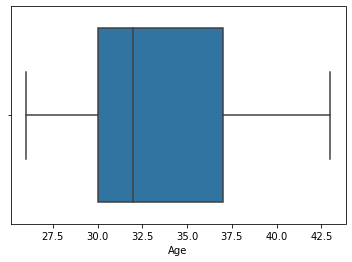

In [27]:
sns.boxplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Spend'>

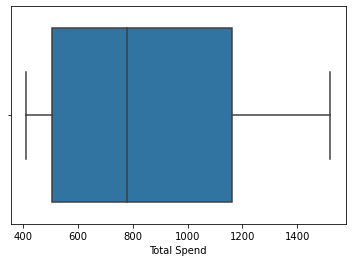

In [28]:
sns.boxplot(df['Total Spend'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Items Purchased'>

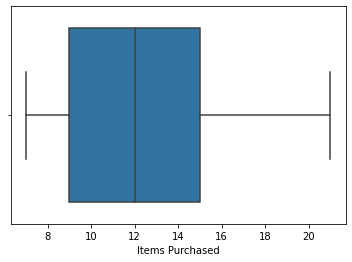

In [29]:
sns.boxplot(df['Items Purchased'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average Rating'>

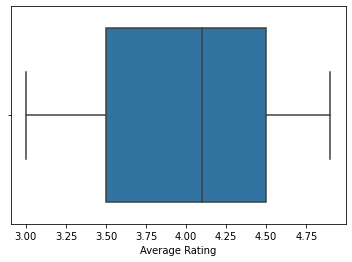

In [30]:
sns.boxplot(df['Average Rating'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Days Since Last Purchase'>

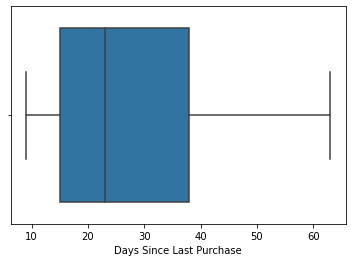

In [31]:
sns.boxplot(df['Days Since Last Purchase'])

In [32]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


<AxesSubplot:xlabel='Satisfaction Level', ylabel='count'>

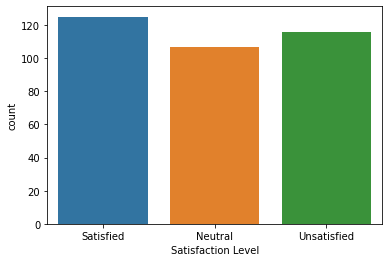

In [33]:
sns.countplot(x=df['Satisfaction Level'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Age'>

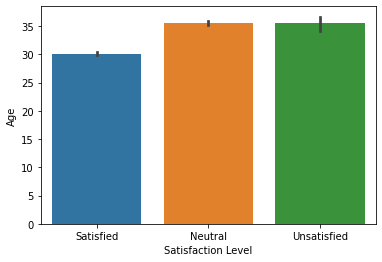

In [34]:
sns.barplot(x=df['Satisfaction Level'],y=df['Age'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Items Purchased'>

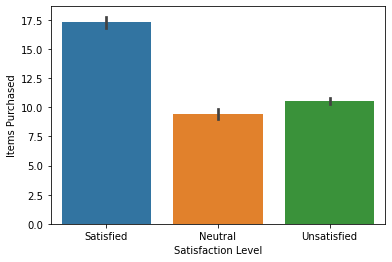

In [35]:
sns.barplot(x=df['Satisfaction Level'],y=df['Items Purchased'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Average Rating'>

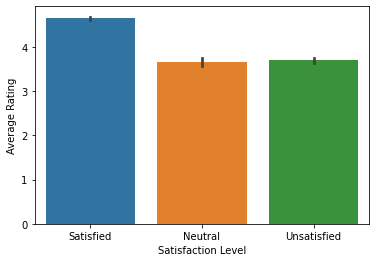

In [36]:

sns.barplot(x=df['Satisfaction Level'],y=df['Average Rating'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Days Since Last Purchase'>

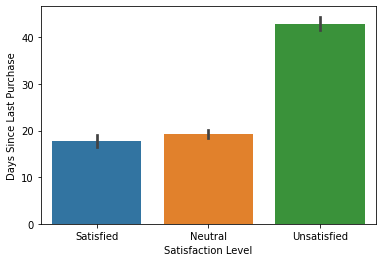

In [37]:
sns.barplot(x=df['Satisfaction Level'],y=df['Days Since Last Purchase'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Total Spend'>

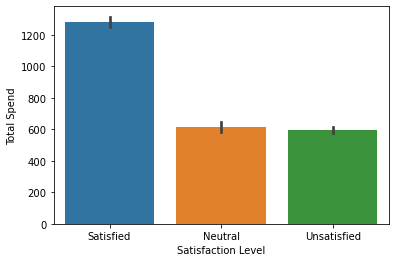

In [38]:

sns.barplot(x=df['Satisfaction Level'],y=df['Total Spend'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Age'>

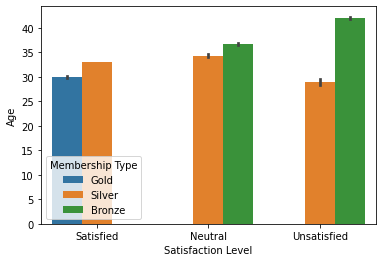

In [39]:
sns.barplot(x=df['Satisfaction Level'],y=df['Age'],hue=df['Membership Type'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Items Purchased'>

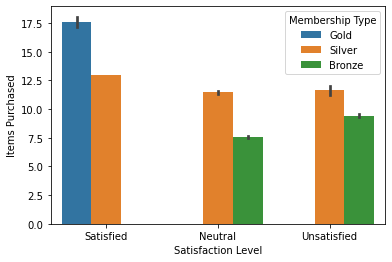

In [40]:
sns.barplot(x=df['Satisfaction Level'],y=df['Items Purchased'],hue=df['Membership Type'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Average Rating'>

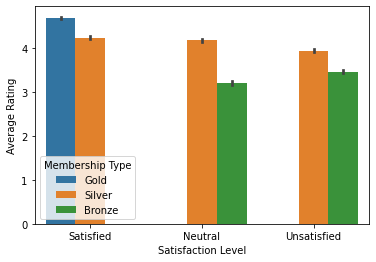

In [41]:
sns.barplot(x=df['Satisfaction Level'],y=df['Average Rating'],hue=df['Membership Type'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Days Since Last Purchase'>

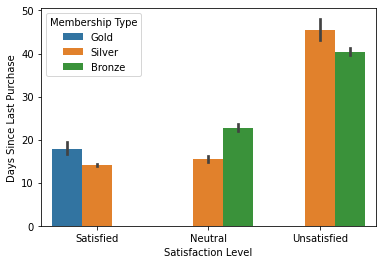

In [42]:
sns.barplot(x=df['Satisfaction Level'],y=df['Days Since Last Purchase'],hue=df['Membership Type'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Total Spend'>

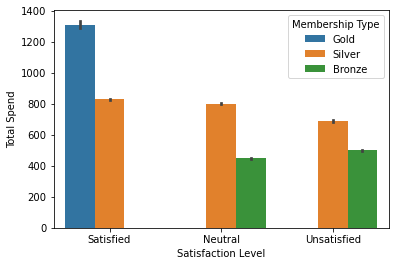

In [43]:
sns.barplot(x=df['Satisfaction Level'],y=df['Total Spend'],hue=df['Membership Type'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Age'>

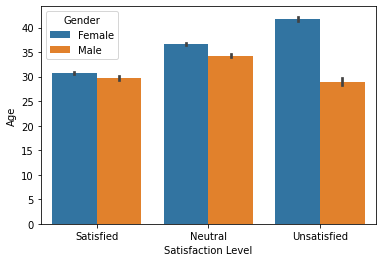

In [44]:
sns.barplot(x=df['Satisfaction Level'],y=df['Age'],hue=df['Gender'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Items Purchased'>

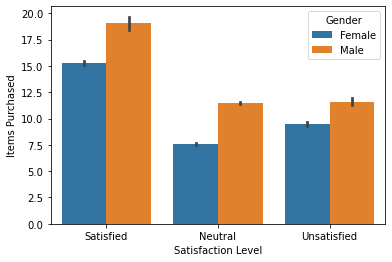

In [45]:
sns.barplot(x=df['Satisfaction Level'],y=df['Items Purchased'],hue=df['Gender'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Average Rating'>

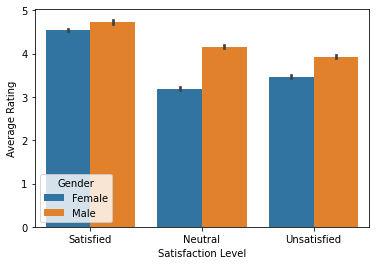

In [46]:
sns.barplot(x=df['Satisfaction Level'],y=df['Average Rating'],hue=df['Gender'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Days Since Last Purchase'>

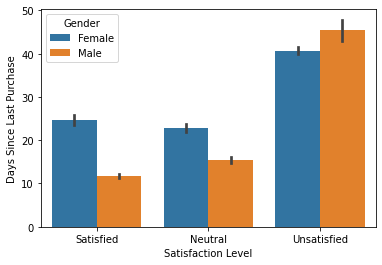

In [47]:
sns.barplot(x=df['Satisfaction Level'],y=df['Days Since Last Purchase'],hue=df['Gender'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Total Spend'>

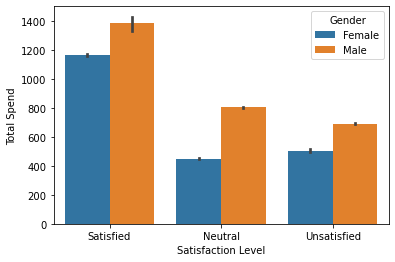

In [48]:
sns.barplot(x=df['Satisfaction Level'],y=df['Total Spend'],hue=df['Gender'])

<AxesSubplot:xlabel='City', ylabel='Total Spend'>

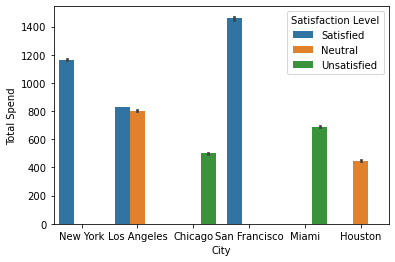

In [49]:
sns.barplot(x=df['City'],y=df['Total Spend'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='City', ylabel='Days Since Last Purchase'>

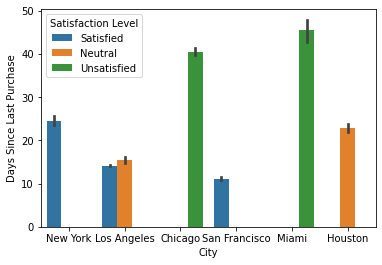

In [50]:
sns.barplot(x=df['City'],y=df['Days Since Last Purchase'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='City', ylabel='Average Rating'>

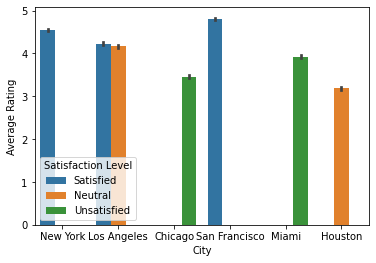

In [51]:
sns.barplot(x=df['City'],y=df['Average Rating'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='City', ylabel='Items Purchased'>

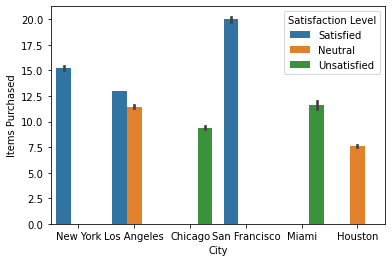

In [52]:
sns.barplot(x=df['City'],y=df['Items Purchased'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='City', ylabel='Age'>

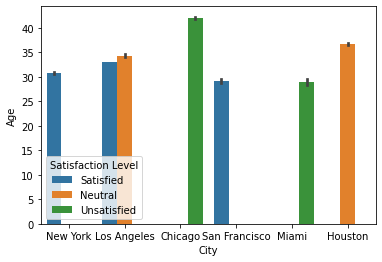

In [53]:
sns.barplot(x=df['City'],y=df['Age'],hue=df['Satisfaction Level'])

In [54]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


<AxesSubplot:xlabel='Satisfaction Level', ylabel='Age'>

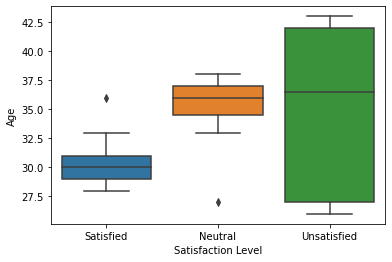

In [55]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Age'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Items Purchased'>

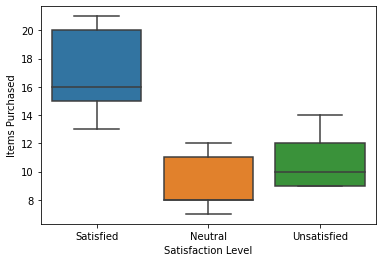

In [56]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Items Purchased'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Average Rating'>

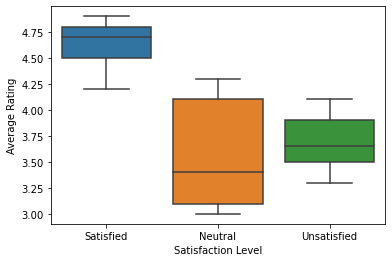

In [57]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Average Rating'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Days Since Last Purchase'>

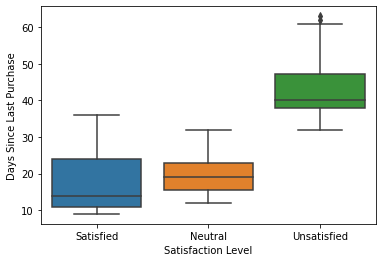

In [58]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Days Since Last Purchase'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Total Spend'>

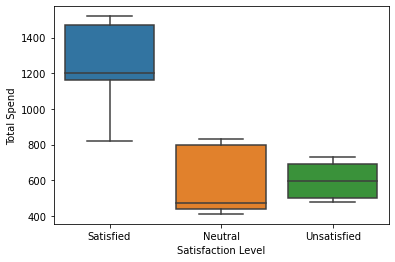

In [59]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Total Spend'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Total Spend'>

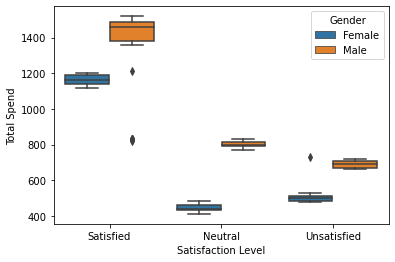

In [60]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Total Spend'],hue=df['Gender'])

<AxesSubplot:xlabel='City', ylabel='Total Spend'>

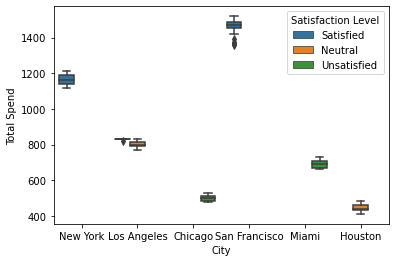

In [61]:
sns.boxplot(x=df['City'],y=df['Total Spend'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Days Since Last Purchase'>

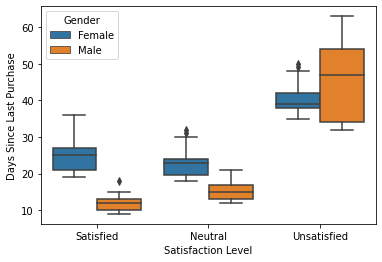

In [62]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Days Since Last Purchase'],hue=df['Gender'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Days Since Last Purchase'>

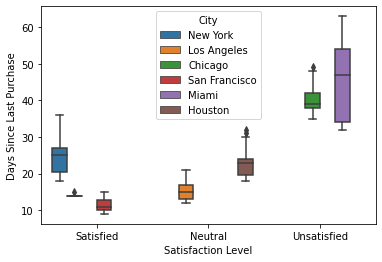

In [63]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Days Since Last Purchase'],hue=df['City'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Average Rating'>

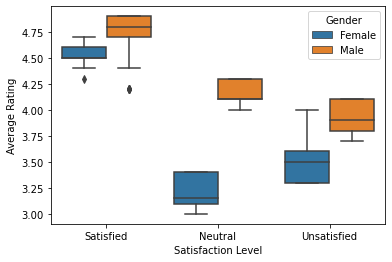

In [64]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Average Rating'],hue=df['Gender'])

<AxesSubplot:xlabel='City', ylabel='Average Rating'>

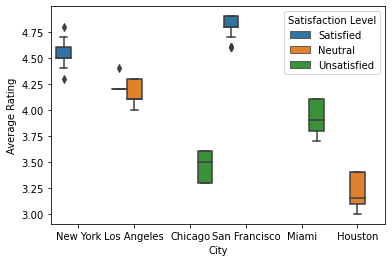

In [65]:
sns.boxplot(x=df['City'],y=df['Average Rating'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Items Purchased'>

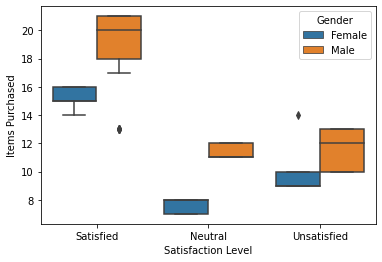

In [66]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Items Purchased'],hue=df['Gender'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Age'>

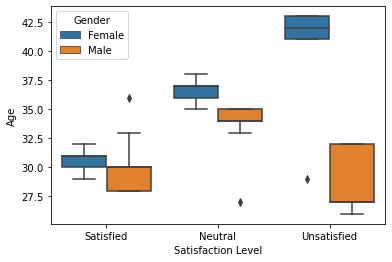

In [67]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Age'],hue=df['Gender'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Age'>

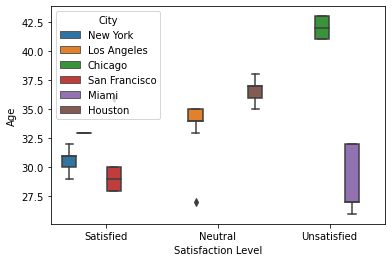

In [68]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Age'],hue=df['City'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Age'>

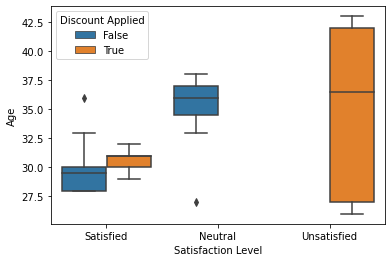

In [69]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Age'],hue=df['Discount Applied'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Items Purchased'>

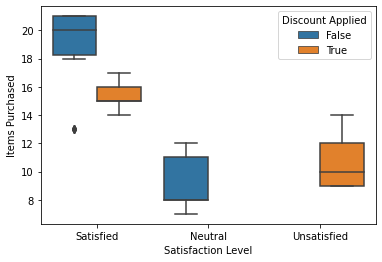

In [70]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Items Purchased'],hue=df['Discount Applied'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Average Rating'>

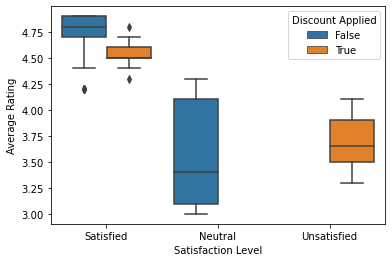

In [71]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Average Rating'],hue=df['Discount Applied'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Days Since Last Purchase'>

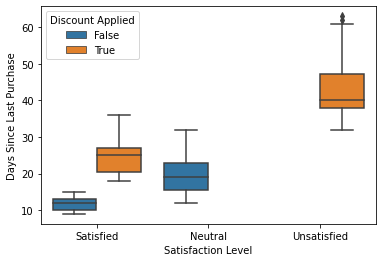

In [72]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Days Since Last Purchase'],hue=df['Discount Applied'])

<AxesSubplot:xlabel='Satisfaction Level', ylabel='Total Spend'>

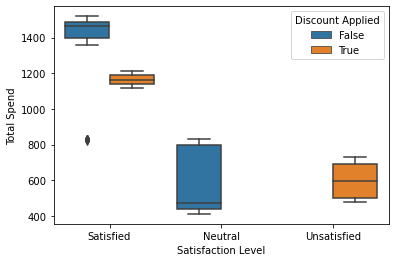

In [73]:
sns.boxplot(x=df['Satisfaction Level'],y=df['Total Spend'],hue=df['Discount Applied'])

In [74]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


<AxesSubplot:xlabel='Age', ylabel='Total Spend'>

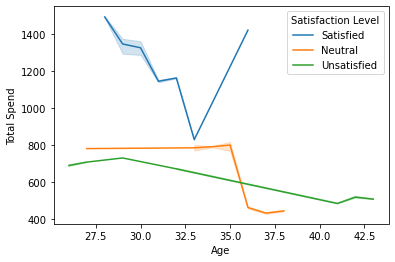

In [75]:
sns.lineplot(x=df['Age'],y=df['Total Spend'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Age', ylabel='Items Purchased'>

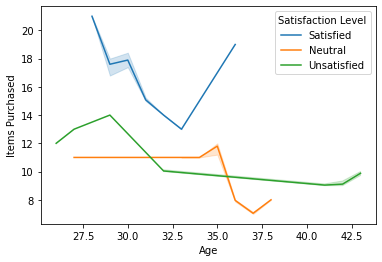

In [76]:
sns.lineplot(x=df['Age'],y=df['Items Purchased'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Age', ylabel='Average Rating'>

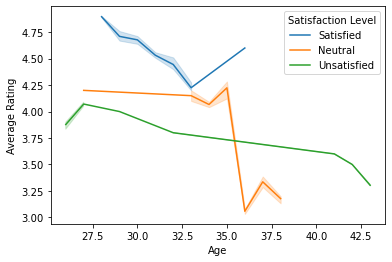

In [77]:
sns.lineplot(x=df['Age'],y=df['Average Rating'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Age', ylabel='Days Since Last Purchase'>

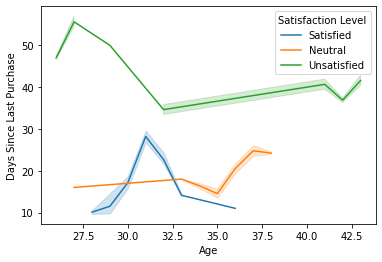

In [78]:
sns.lineplot(x=df['Age'],y=df['Days Since Last Purchase'],hue=df['Satisfaction Level'])

In [79]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [80]:
df.describe()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,348.000000,348.000000,348.000000,348.000000,348.000000
mean,33.577586,847.793103,12.632184,4.023563,26.614943
std,4.878024,361.692375,4.146079,0.579145,13.474750
min,26.000000,410.800000,7.000000,3.000000,9.000000
25%,30.000000,505.750000,9.000000,3.500000,15.000000
50%,32.000000,780.200000,12.000000,4.100000,23.000000
75%,37.000000,1160.600000,15.000000,4.500000,38.000000
max,43.000000,1520.100000,21.000000,4.900000,63.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

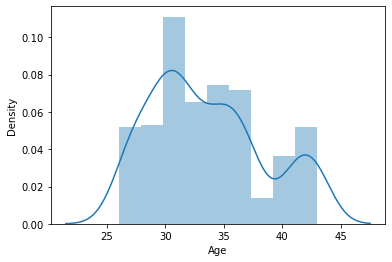

In [81]:
sns.distplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Spend', ylabel='Density'>

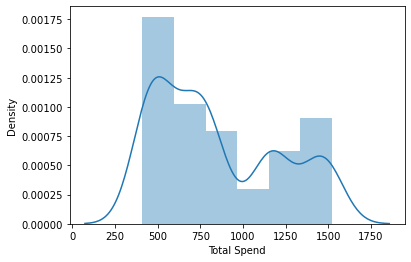

In [82]:
sns.distplot(df['Total Spend'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Items Purchased', ylabel='Density'>

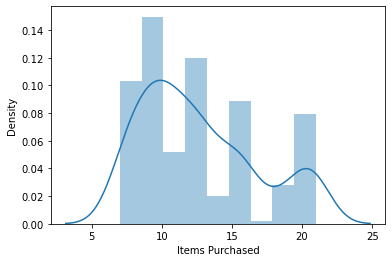

In [83]:
sns.distplot(df['Items Purchased'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average Rating', ylabel='Density'>

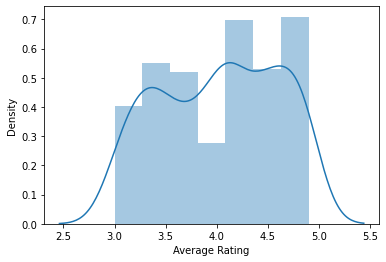

In [84]:
sns.distplot(df['Average Rating'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Days Since Last Purchase', ylabel='Density'>

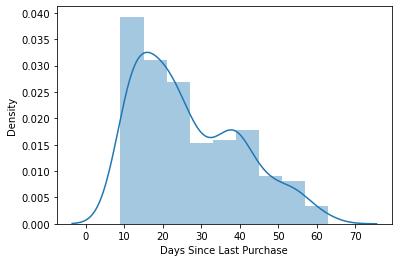

In [85]:
sns.distplot(df['Days Since Last Purchase'])

In [86]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [87]:
df['Age_Range']=pd.qcut(df['Age'],4)


In [88]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Age_Range
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,"(25.999, 30.0]"
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,"(32.0, 37.0]"
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,"(37.0, 43.0]"
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,"(25.999, 30.0]"
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,"(25.999, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied,"(30.0, 32.0]"
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral,"(32.0, 37.0]"
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied,"(25.999, 30.0]"
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral,"(32.0, 37.0]"


<AxesSubplot:xlabel='Age_Range', ylabel='count'>

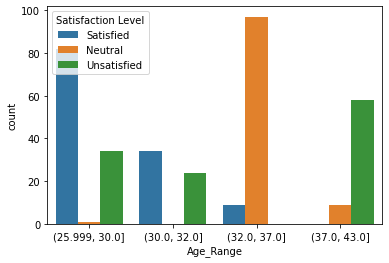

In [89]:
sns.countplot(x=df['Age_Range'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Age_Range', ylabel='Items Purchased'>

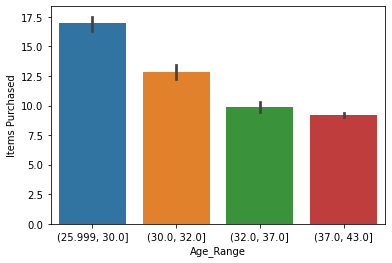

In [90]:
sns.barplot(x=df['Age_Range'],y=df['Items Purchased'])

<AxesSubplot:xlabel='Age_Range', ylabel='Total Spend'>

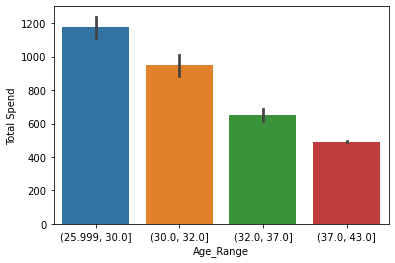

In [91]:
sns.barplot(x=df['Age_Range'],y=df['Total Spend'])

<AxesSubplot:xlabel='Age_Range', ylabel='Average Rating'>

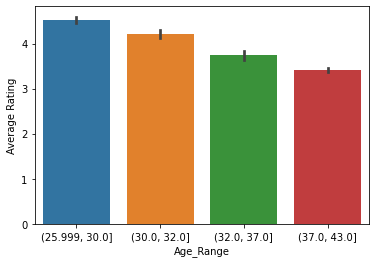

In [92]:
sns.barplot(x=df['Age_Range'],y=df['Average Rating'])

<AxesSubplot:xlabel='Age_Range', ylabel='Days Since Last Purchase'>

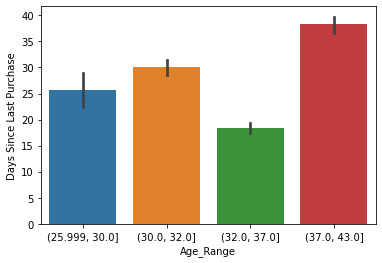

In [93]:
sns.barplot(x=df['Age_Range'],y=df['Days Since Last Purchase'])

In [94]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Age_Range
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,"(25.999, 30.0]"
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,"(32.0, 37.0]"
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,"(37.0, 43.0]"
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,"(25.999, 30.0]"
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,"(25.999, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied,"(30.0, 32.0]"
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral,"(32.0, 37.0]"
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied,"(25.999, 30.0]"
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral,"(32.0, 37.0]"


In [95]:
df['Average Rating_Range']=pd.qcut(df['Average Rating'],4)

In [96]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Age_Range,Average Rating_Range
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,"(25.999, 30.0]","(4.5, 4.9]"
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,"(32.0, 37.0]","(3.5, 4.1]"
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,"(37.0, 43.0]","(2.999, 3.5]"
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,"(25.999, 30.0]","(4.5, 4.9]"
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,"(25.999, 30.0]","(3.5, 4.1]"
...,...,...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied,"(30.0, 32.0]","(3.5, 4.1]"
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral,"(32.0, 37.0]","(2.999, 3.5]"
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied,"(25.999, 30.0]","(4.1, 4.5]"
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral,"(32.0, 37.0]","(4.1, 4.5]"


<AxesSubplot:xlabel='Average Rating_Range', ylabel='count'>

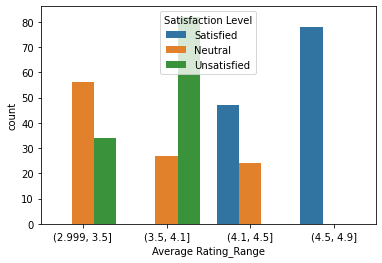

In [97]:
sns.countplot(x=df['Average Rating_Range'],hue=df['Satisfaction Level'])

In [98]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Age_Range,Average Rating_Range
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,"(25.999, 30.0]","(4.5, 4.9]"
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,"(32.0, 37.0]","(3.5, 4.1]"
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,"(37.0, 43.0]","(2.999, 3.5]"
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,"(25.999, 30.0]","(4.5, 4.9]"
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,"(25.999, 30.0]","(3.5, 4.1]"


<AxesSubplot:xlabel='Average Rating_Range', ylabel='Total Spend'>

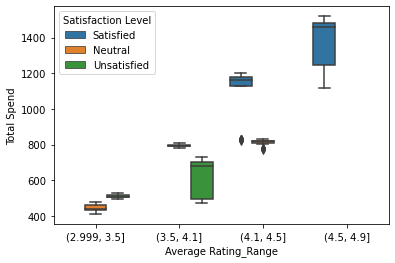

In [99]:
sns.boxplot(x=df['Average Rating_Range'],y=df['Total Spend'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Age_Range', ylabel='Total Spend'>

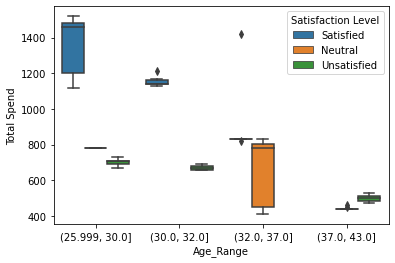

In [100]:
sns.boxplot(x=df['Age_Range'],y=df['Total Spend'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Age_Range', ylabel='Items Purchased'>

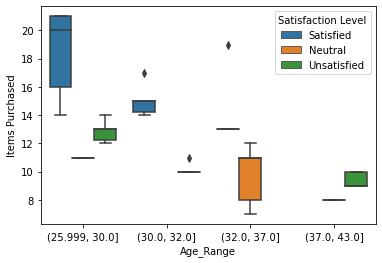

In [101]:
sns.boxplot(x=df['Age_Range'],y=df['Items Purchased'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Average Rating_Range', ylabel='Items Purchased'>

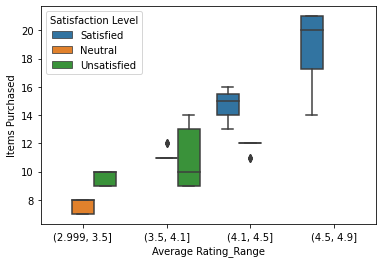

In [102]:
sns.boxplot(x=df['Average Rating_Range'],y=df['Items Purchased'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Age_Range', ylabel='Average Rating'>

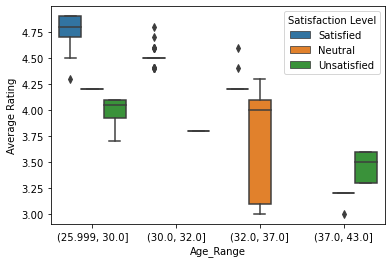

In [103]:
sns.boxplot(x=df['Age_Range'],y=df['Average Rating'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Age_Range', ylabel='Days Since Last Purchase'>

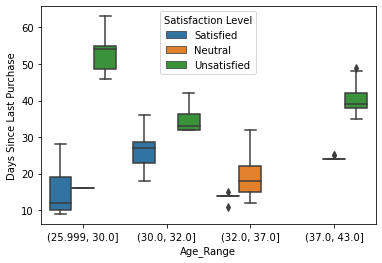

In [104]:
sns.boxplot(x=df['Age_Range'],y=df['Days Since Last Purchase'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Average Rating_Range', ylabel='Days Since Last Purchase'>

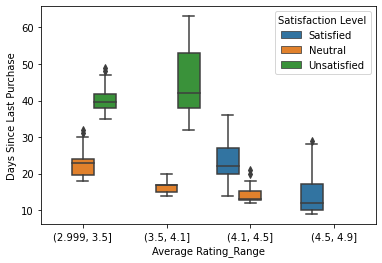

In [105]:
sns.boxplot(x=df['Average Rating_Range'],y=df['Days Since Last Purchase'],hue=df['Satisfaction Level'])

<AxesSubplot:xlabel='Average Rating_Range', ylabel='Age'>

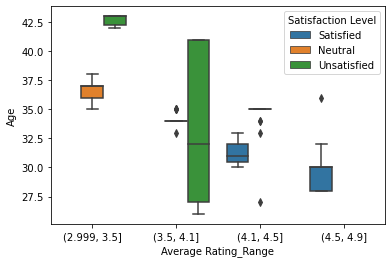

In [106]:
sns.boxplot(x=df['Average Rating_Range'],y=df['Age'],hue=df['Satisfaction Level'])

In [107]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Age_Range,Average Rating_Range
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,"(25.999, 30.0]","(4.5, 4.9]"
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,"(32.0, 37.0]","(3.5, 4.1]"
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,"(37.0, 43.0]","(2.999, 3.5]"
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,"(25.999, 30.0]","(4.5, 4.9]"
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,"(25.999, 30.0]","(3.5, 4.1]"


In [108]:
df=df.drop(['Age_Range','Average Rating_Range'],axis=1)

In [109]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


# Top City with highest Spending

In [110]:
new_df=df[['City','Total Spend']]

In [111]:
new_df

,City,Total Spend
0,New York,1120.20
1,Los Angeles,780.50
2,Chicago,510.75
3,San Francisco,1480.30
4,Miami,720.40
...,...,...
345,Miami,660.30
346,Houston,470.50
347,New York,1190.80
348,Los Angeles,780.20


In [112]:
top_city=new_df.groupby(new_df['City']).mean()


In [113]:
top_city=top_city.sort_values(by="Total Spend",ascending=False)


In [114]:
top_city

,Total Spend
City,
San Francisco,1459.772414
New York,1165.035593
Los Angeles,805.491525
Miami,690.389655
Chicago,499.882759
Houston,447.648214


In [115]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


# Total Spend by Membership Type

In [116]:
new_df=df.groupby("Membership Type")


In [117]:
label_df=new_df['Total Spend'].mean().index

In [118]:
val_df=new_df['Total Spend'].mean().values

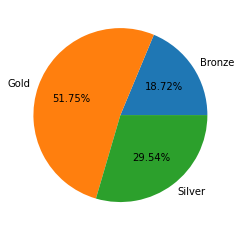

In [119]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Membership Type'>

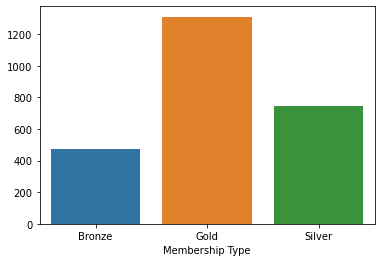

In [120]:
sns.barplot(x=label_df,y=val_df)

# Total Spend by Gender

In [121]:
new_df=df.groupby("Gender")


In [122]:
label_df=new_df['Total Spend'].mean().index

In [123]:
val_df=new_df['Total Spend'].mean().values

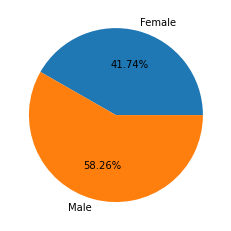

In [124]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Gender'>

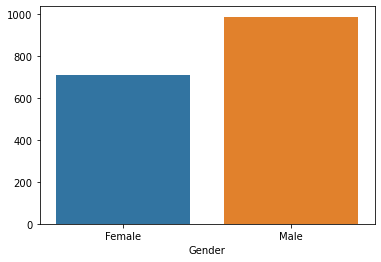

In [125]:
sns.barplot(x=label_df,y=val_df)

# Total Spend by Satisfaction Level

In [126]:
new_df=df.groupby("Satisfaction Level")


In [127]:
label_df=new_df['Total Spend'].mean().index

In [128]:
val_df=new_df['Total Spend'].mean().values

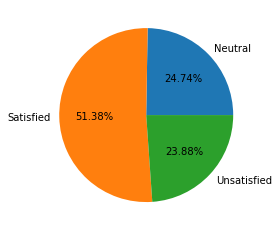

In [129]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Satisfaction Level'>

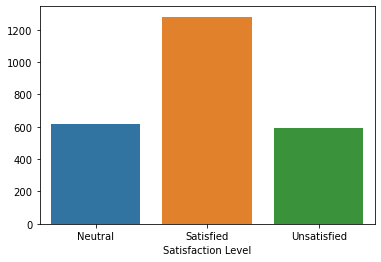

In [130]:
sns.barplot(x=label_df,y=val_df)

# Max item purchased by which City

In [131]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [132]:
city_df=df.groupby("City")


In [133]:
label_df=city_df['Items Purchased'].sum().sort_values(ascending=False).index



In [134]:
val_df=city_df['Items Purchased'].sum().sort_values(ascending=False).values



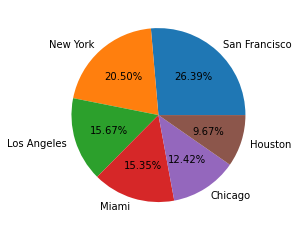

In [135]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='City'>

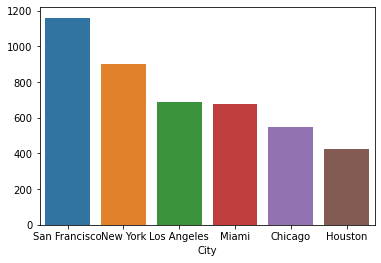

In [136]:
sns.barplot(x=label_df,y=val_df)

# Compare the customers with Membership Type and Satisfaction Level 

In [137]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...
345,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [138]:
discount_df=df.groupby(["Membership Type","Satisfaction Level"])


In [139]:
label_df=discount_df.size().sort_values(ascending=False).index


In [140]:
val_df=discount_df.size().sort_values(ascending=False).values

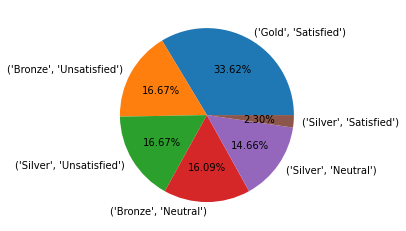

In [141]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Compare the customers of different city with Satisfaction Level 

In [142]:
city_df=df.groupby(["City","Satisfaction Level"])


In [143]:
label_df=city_df.size().sort_values(ascending=False).index


In [144]:
val_df=city_df.size().sort_values(ascending=False).values

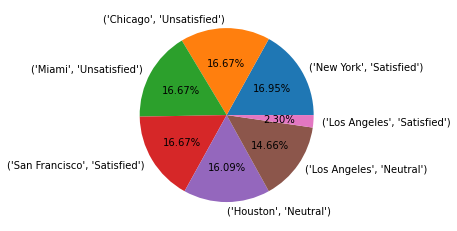

In [145]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Compare the Gender with Satisfaction Level 

In [146]:
gender_df=df.groupby(["Gender","Satisfaction Level"])


In [147]:
label_df=gender_df.size().sort_values(ascending=False).index


In [148]:
val_df=gender_df.size().sort_values(ascending=False).values

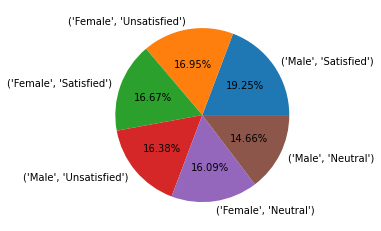

In [149]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Compare the Discount Applied with Satisfaction Level 

In [150]:
dis_applied_df=df.groupby(["Discount Applied","Satisfaction Level"])


In [151]:
label_df=dis_applied_df.size().sort_values(ascending=False).index


In [152]:
val_df=dis_applied_df.size().sort_values(ascending=False).values

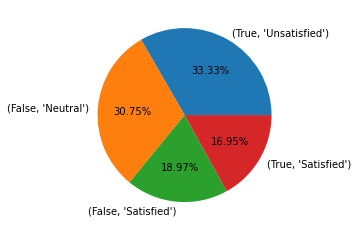

In [153]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [154]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


# Compare the customers with Membership Type and Satisfaction Level  with Total Spend

In [155]:
new_df=df.groupby(["Membership Type","Satisfaction Level"])['Total Spend'].mean().sort_values(ascending=False)


In [156]:
new_df.columns=['Membership Type','Satisfaction Level','Total Spend']

In [157]:
new_df

Membership Type  Satisfaction Level
Gold             Satisfied             1311.144444
Silver           Satisfied              829.500000
                 Neutral                801.725490
                 Unsatisfied            690.389655
Bronze           Unsatisfied            499.882759
                 Neutral                447.648214
Name: Total Spend, dtype: float64

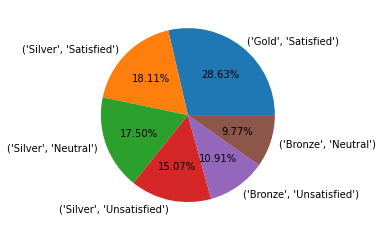

In [158]:
plt.pie(x=new_df.values,labels=new_df.index,autopct="%1.2f%%")
plt.show()

# Compare the customers with Discount Applied and Satisfaction Level  with Total Spend

In [159]:
new_df=df.groupby(["Discount Applied","Satisfaction Level"])['Total Spend'].mean().sort_values(ascending=False)


In [160]:
new_df.columns=['Discount Applied','Satisfaction Level','Total Spend']

In [161]:
new_df

Discount Applied  Satisfaction Level
False             Satisfied             1383.375758
True              Satisfied             1165.035593
False             Neutral                616.414019
True              Unsatisfied            595.136207
Name: Total Spend, dtype: float64

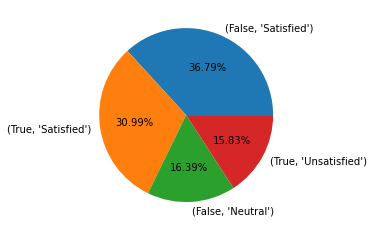

In [162]:
plt.pie(x=new_df.values,labels=new_df.index,autopct="%1.2f%%")
plt.show()

In [163]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [164]:
le=LabelEncoder()


In [165]:
df['Gender']=le.fit_transform(df['Gender'])


In [166]:
df['City']=le.fit_transform(df['City'])

In [167]:
df['Membership Type']=le.fit_transform(df['Membership Type'])

In [168]:
df['Discount Applied']=le.fit_transform(df['Discount Applied'])

In [169]:
df['Satisfaction Level']=le.fit_transform(df['Satisfaction Level'])

In [170]:
df

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,0,29,4,1,1120.20,14,4.6,1,25,1
1,1,34,2,2,780.50,11,4.1,0,18,0
2,0,43,0,0,510.75,9,3.4,1,42,2
3,1,30,5,1,1480.30,19,4.7,0,12,1
4,1,27,3,2,720.40,13,4.0,1,55,2
...,...,...,...,...,...,...,...,...,...,...
345,1,32,3,2,660.30,10,3.8,1,42,2
346,0,36,1,0,470.50,8,3.0,0,27,0
347,0,30,4,1,1190.80,16,4.5,1,28,1
348,1,34,2,2,780.20,11,4.2,0,21,0


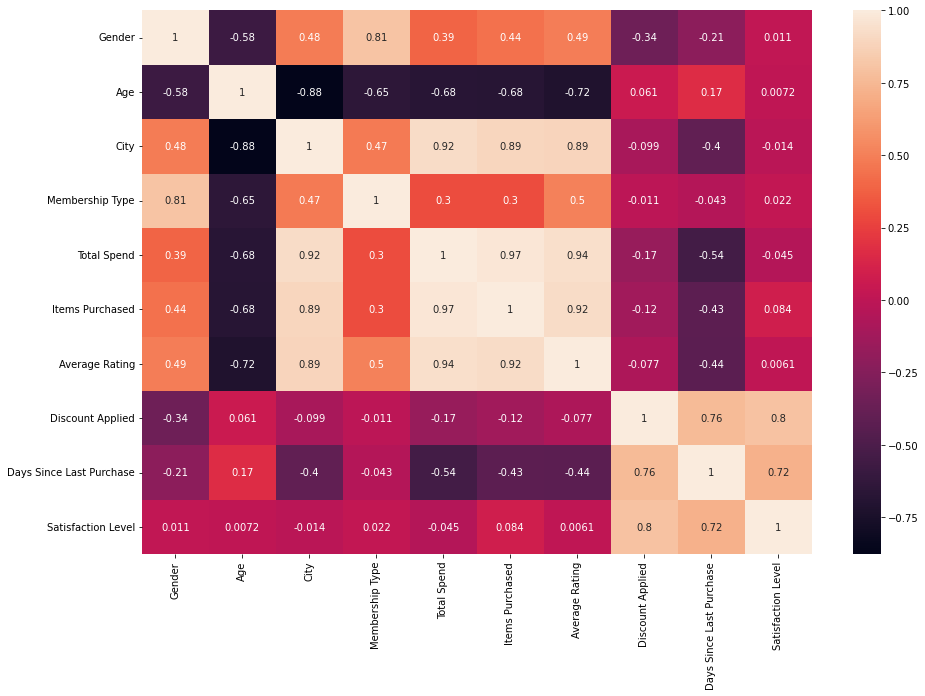

In [171]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

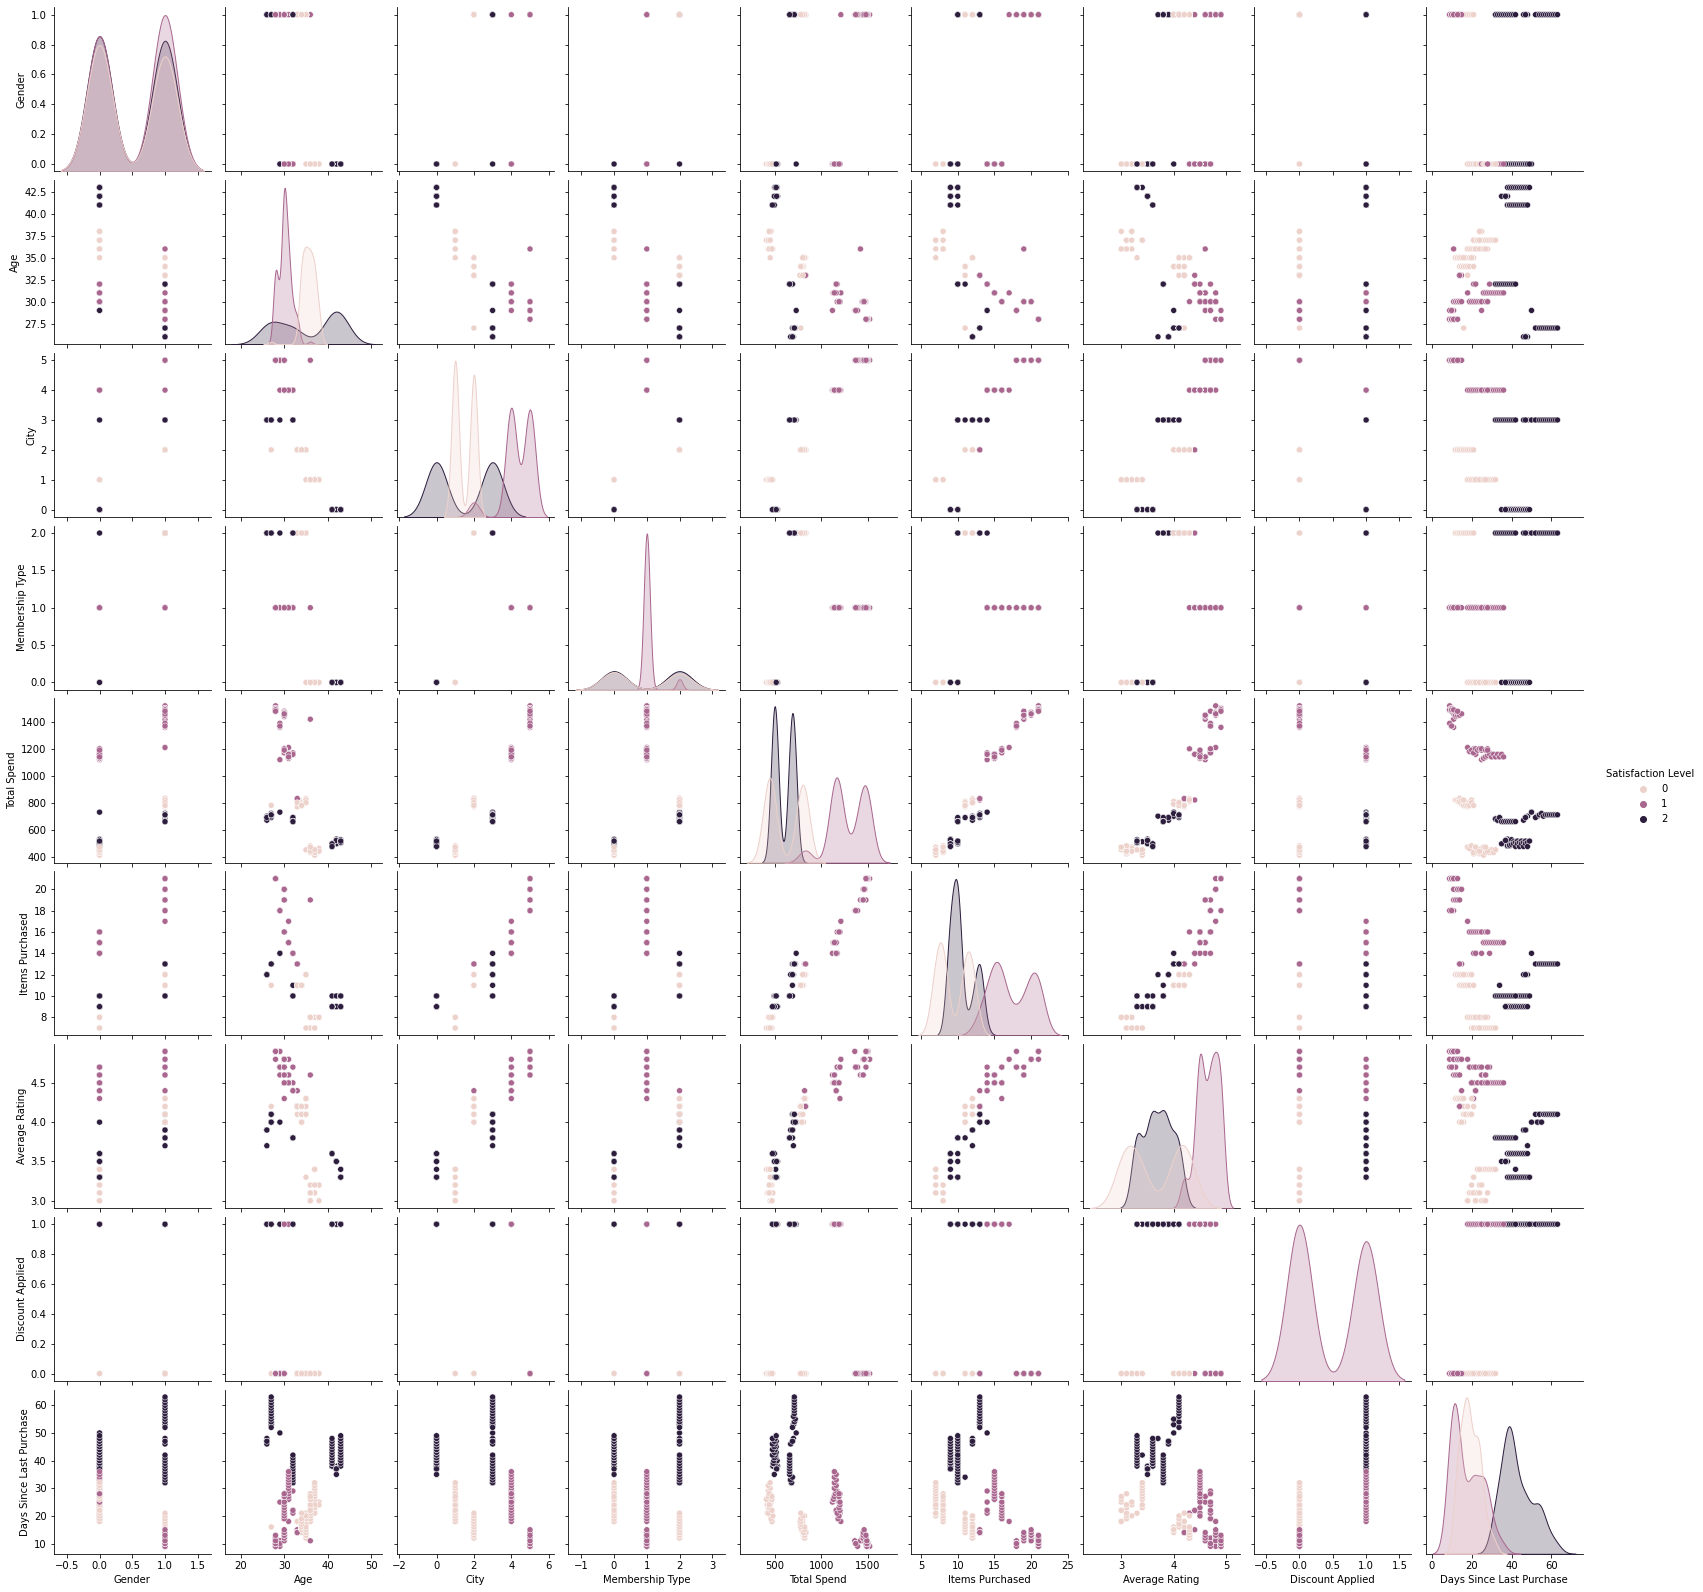

In [172]:
sns.pairplot(data=df,hue="Satisfaction Level")

In [173]:
y=df['Satisfaction Level']

In [174]:
X=df.drop('Satisfaction Level',axis=1)

In [175]:
sc=StandardScaler()

In [176]:
X=sc.fit_transform(X)


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [178]:
X_train.shape

(278, 9)

In [179]:
X_test.shape

(70, 9)

In [180]:
y_train.shape

(278,)

In [181]:
y_test.shape

(70,)

# RandomForestClassifier

In [182]:
rfc=RandomForestClassifier()

In [183]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [184]:
y_pred=rfc.predict(X_train)


In [185]:
accuracy_score(y_train,y_pred)

1.0

In [186]:
y_pred=rfc.predict(X_test)


In [187]:
accuracy_score(y_test,y_pred)

0.9857142857142858

In [188]:
KF=KFold(5)


In [189]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)


In [190]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.9285714285714286
1 1.0
2 1.0
3 1.0
4 1.0


In [191]:
scores.mean()

0.9857142857142858

In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        19

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70



# LogisticRegression

In [193]:
lr=LogisticRegression()


In [194]:
lr.fit(X_train,y_train)

LogisticRegression()

In [195]:
y_pred=lr.predict(X_train)


In [196]:
accuracy_score(y_train,y_pred)

0.9712230215827338

In [197]:
y_pred=lr.predict(X_test)


In [198]:
accuracy_score(y_test,y_pred)

1.0

In [199]:
KF=KFold(5)


In [200]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)


In [201]:
for idx,value in enumerate(scores):
    print(idx,value)

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0


In [202]:
scores.mean()

1.0

In [203]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        19

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



# KNeighborsClassifier

In [204]:
knc=KNeighborsClassifier()


In [205]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [206]:
y_pred=knc.predict(X_train)


In [207]:
accuracy_score(y_train,y_pred)

1.0

In [208]:
y_pred=knc.predict(X_test)


In [209]:
accuracy_score(y_test,y_pred)

1.0

In [210]:
KF=KFold(5)


In [211]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)


In [212]:
for idx,value in enumerate(scores):
    print(idx,value)

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0


In [213]:
scores.mean()

1.0

In [214]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        19

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



# XGBClassifier

In [215]:
xgb_i=xgb.XGBClassifier()

In [216]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [217]:
y_pred=xgb_i.predict(X_train)


In [218]:
accuracy_score(y_train,y_pred)

1.0

In [219]:
y_pred=xgb_i.predict(X_test)


In [220]:
accuracy_score(y_test,y_pred)

1.0

In [221]:
KF=KFold(5)


In [222]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)


In [223]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.8571428571428571
1 1.0
2 1.0
3 1.0
4 1.0


In [224]:
scores.mean()

0.9714285714285715

In [225]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        19

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



# DecisionTreeClassifier

In [226]:
dtc=DecisionTreeClassifier()


In [227]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [228]:
y_pred=dtc.predict(X_train)


In [229]:
accuracy_score(y_train,y_pred)

1.0

In [230]:
y_pred=dtc.predict(X_test)


In [231]:
accuracy_score(y_test,y_pred)

0.9857142857142858

In [232]:
KF=KFold(5)


In [233]:
scores=cross_val_score(dtc,X_test,y_test,cv=KF)


In [234]:
for idx,value in enumerate(scores):
    print(idx,value)

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0


In [235]:
scores.mean()

1.0

In [236]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        19

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70



# Naive Bayes Classifier

In [237]:
model=GaussianNB()


In [238]:
model.fit(X_train,y_train)

GaussianNB()

In [239]:
y_pred=model.predict(X_train)


In [240]:
accuracy_score(y_train,y_pred)

0.9712230215827338

In [241]:
y_pred=model.predict(X_test)


In [242]:
accuracy_score(y_test,y_pred)

1.0

In [243]:
KF=KFold(5)


In [244]:
scores=cross_val_score(model,X_test,y_test,cv=KF)


In [245]:
for idx,value in enumerate(scores):
    print(idx,value)

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0


In [246]:
scores.mean()

1.0

In [247]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        19

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

